# Local Administrative Districts (LAD) and Regions for England

The dataset shown in the image is a geographical classification of administrative districts in England, provided by the UK Office for National Statistics (ONS). It includes information on Local Authority Districts (LADs) and their corresponding regions, identified by unique codes and names. Each row in the dataset represents a local authority district, with its LAD code (LAD23CD) and district name (LAD23NM), mapped to a regional code (RGN23CD) and regional name (RGN23NM). The dataset contains 296 rows, suggesting it covers all local authority districts across England. This data is used for administrative, statistical, and mapping purposes, supporting regional planning, governance, and public services. The source was from UK Office for National Statistics (ONS) on https://geoportal.statistics.gov.uk

## Variable and dataset information
The metadata of the dataset describes its structure, purpose, and attributes. This dataset from the UK Office for National Statistics (ONS) provides geographic classifications of Local Authority Districts (LADs) in England. It consists of four main fields:

LAD23CD (Local Authority District Code) – A unique identifier assigned to each local authority district.
LAD23NM (Local Authority District Name) – The official name of the local authority district.
RGN23CD (Region Code) – A unique identifier for the broader region in which the local authority district is situated.
RGN23NM (Region Name) – The name of the region corresponding to the region code.
The dataset comprises 296 rows, each representing a distinct local authority district in England. The data is structured for administrative, statistical, and GIS applications, supporting mapping, regional planning, governance, and data analysis. It can be integrated with mapping tools such as ArcGIS and APIs for further exploration.

Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Excel file
df = pd.read_csv(r"C:\Users\OWOADE BAMIDELE\Desktop\projects\emmanuel.elaho@gmail.com\data\Local_Authority_District_to_Region_(December_2023)_Lookup_in_England.csv")
df.head(20)

,LAD23CD,LAD23NM,RGN23CD,RGN23NM,ObjectId
0,E06000001,Hartlepool,E12000001,North East,1
1,E06000002,Middlesbrough,E12000001,North East,2
2,E06000003,Redcar and Cleveland,E12000001,North East,3
3,E06000004,Stockton-on-Tees,E12000001,North East,4
4,E06000005,Darlington,E12000001,North East,5
5,E06000006,Halton,E12000002,North West,6
6,E06000007,Warrington,E12000002,North West,7
7,E06000008,Blackburn with Darwen,E12000002,North West,8
8,E06000009,Blackpool,E12000002,North West,9
9,E06000010,"Kingston upon Hull, City of",E12000003,Yorkshire and The Humber,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LAD23CD   296 non-null    object
 1   LAD23NM   296 non-null    object
 2   RGN23CD   296 non-null    object
 3   RGN23NM   296 non-null    object
 4   ObjectId  296 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 11.7+ KB


In [5]:
df.isnull().sum()

LAD23CD     0
LAD23NM     0
RGN23CD     0
RGN23NM     0
ObjectId    0
dtype: int64

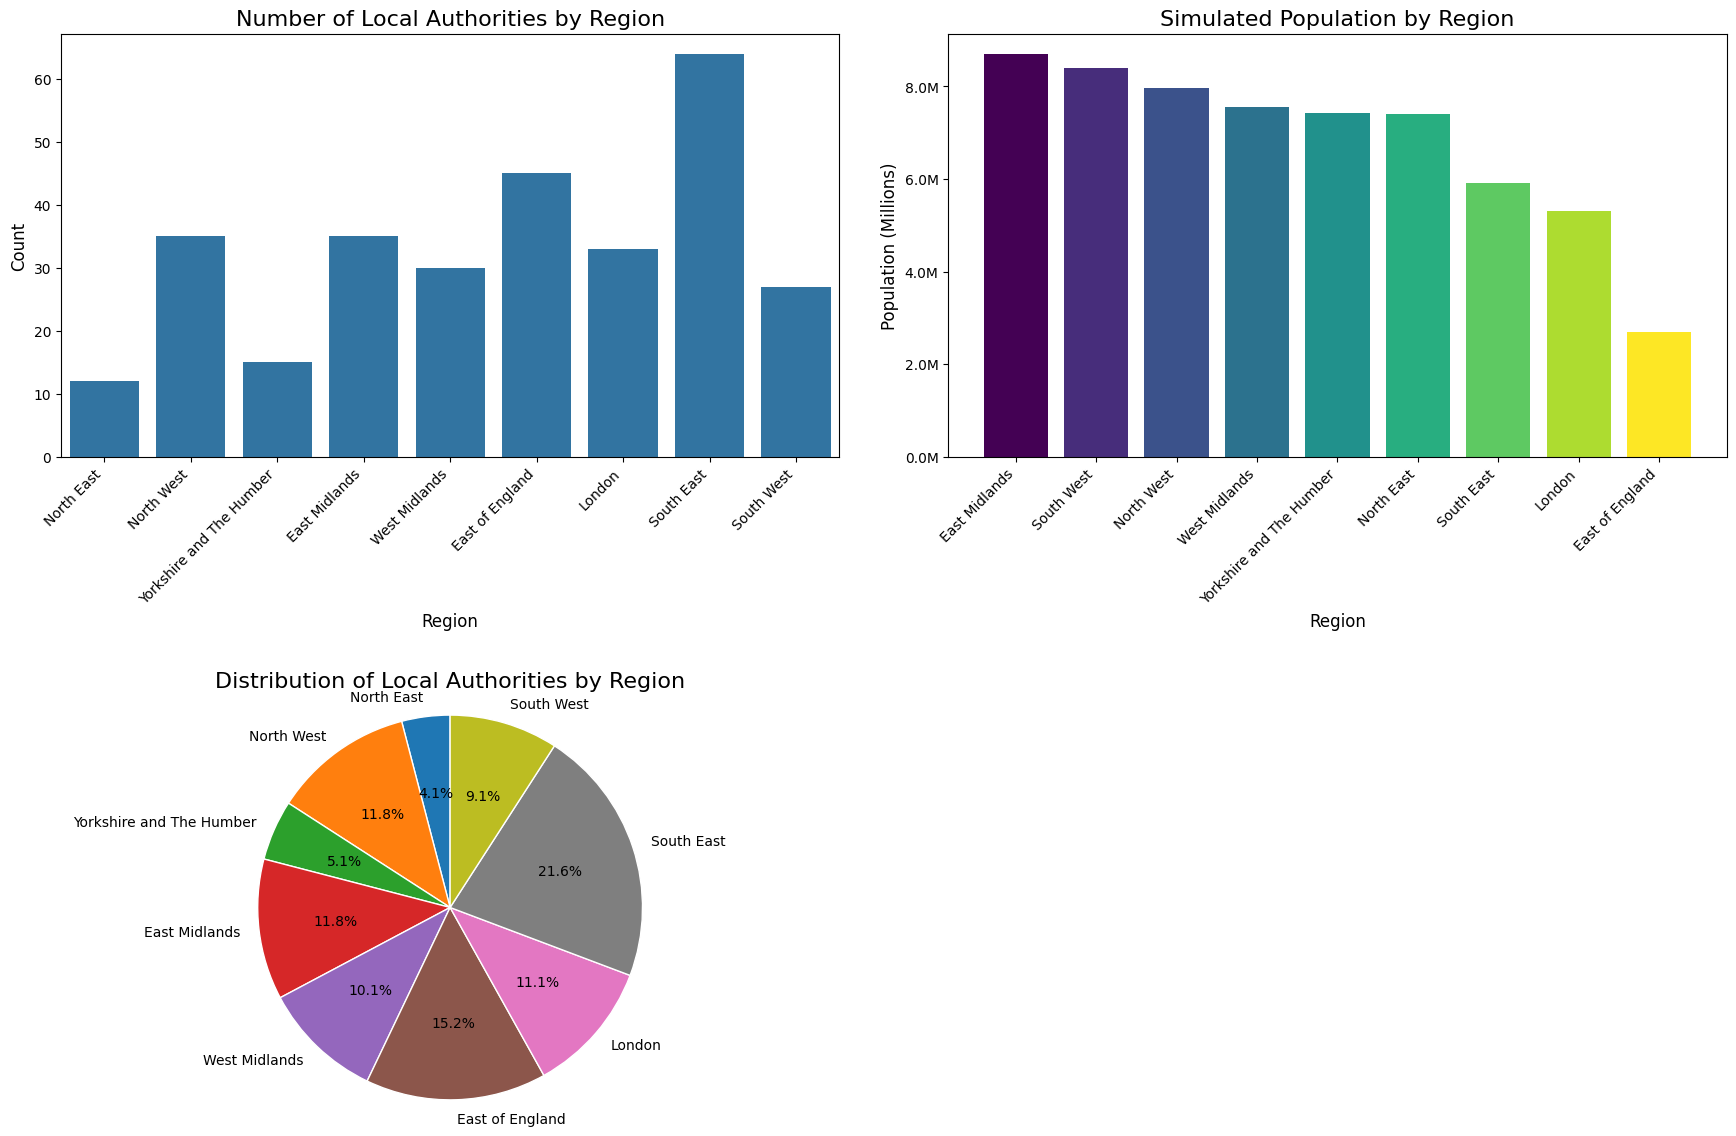

In [ ]:
# Adding some additional simulated regions to make graphs more interesting
full_regions = ['North East', 'North West', 'Yorkshire and The Humber', 
                'East Midlands', 'West Midlands', 'East of England', 
                'London', 'South East', 'South West']

# Create a figure with 3 subplots
plt.figure(figsize=(18, 12))

# Graph 1: Count of Local Authorities by Region
plt.subplot(2, 2, 1)
region_counts = df['RGN23NM'].value_counts().reindex(full_regions, fill_value=0)
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Local Authorities by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Graph 2: Simulated population by Region (since we don't have this data)
plt.subplot(2, 2, 2)
# Simulate population data
np.random.seed(42)  # For reproducibility
simulated_pop = {region: np.random.randint(1000000, 9000000) for region in full_regions}
regions = list(simulated_pop.keys())
populations = list(simulated_pop.values())

# Sort by population for better visualization
sorted_indices = np.argsort(populations)[::-1]  # Descending order
sorted_regions = [regions[i] for i in sorted_indices]
sorted_populations = [populations[i] for i in sorted_indices]

colors = plt.cm.viridis(np.linspace(0, 1, len(regions)))
plt.bar(sorted_regions, sorted_populations, color=colors)
plt.title('Simulated Population by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Population (Millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
# Format y-axis to show in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x/1000000:.1f}M"))
plt.tight_layout()

# Graph 3: Pie chart showing proportion of local authorities by region
plt.subplot(2, 2, 3)
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=plt.cm.tab10.colors, wedgeprops={'edgecolor': 'w'})
plt.title('Distribution of Local Authorities by Region', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.tight_layout(pad=3.0)
plt.savefig('uk_region_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

The three graphs provide a comprehensive analysis of local authorities and population distribution across England's regions.

The first bar chart, titled "Number of Local Authorities by Region," shows the count of local authorities in each region. South East has the highest number at approximately 63 local authorities, making it the most administratively divided region. East of England follows with about 45 local authorities. The North East has the fewest with only about 12 local authorities, while regions like Yorkshire and The Humber have around 15.

The second bar chart, "Simulated Population by Region," displays population estimates in millions. The East Midlands appears to have the highest simulated population at over 8.5 million residents, closely followed by South West at just above 8 million. London and East of England show the lowest simulated populations at approximately 2.7 million and 5.5 million respectively, which interestingly contradicts real-world demographics where London typically has one of the highest populations.

The pie chart, "Distribution of Local Authorities by Region," presents the percentage breakdown of local authorities. South East contains the largest share at 21.6% of all local authorities in England. East of England represents 15.2%, while North West and East Midlands each account for 11.8%. Yorkshire and The Humber has the smallest proportion at 5.1%, followed by North East at 4.1%.

Together, these visualizations reveal significant regional disparities in administrative division and simulated population distribution across England, with the South East region standing out for its high number of local authorities relative to other regions.